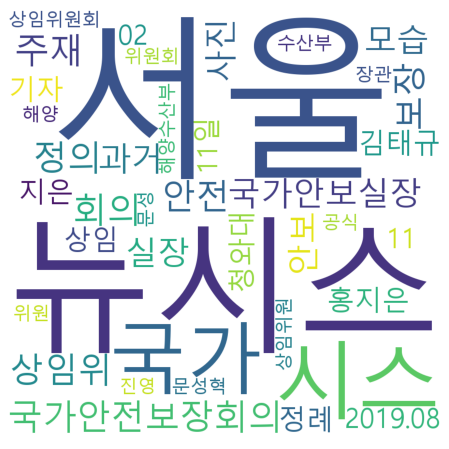

In [20]:
import feedparser
import newspaper
# pip install feedparser
# pip3 install newspaper3k

from konlpy.tag import Kkma
from collections import Counter
from wordcloud import WordCloud

feeds = feedparser.parse('https://media.daum.net/syndication/today_sisa.rss')
feeds
links = [entry['link'] for entry in feeds['entries']]
from tqdm import tqdm_notebook
news_text=''
#links
for link in tqdm_notebook(links):
    article = newspaper.Article(link,language='ko')
    article.download()
    article.parse()
    news_text = article.text
    news_text +=article.text
news_text

import matplotlib.pyplot as plt 
import platform

kkma = Kkma()
nouns = kkma.nouns(news_text)
nouns = [n for n in nouns if len(n)>1]
count = Counter(nouns)
tags =  count.most_common(40)
tags
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",background_color='white',width=900,height=900)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()





